In [1]:
#import packages
import numpy as np
import pygmt
import glob
from geographiclib.geodesic import Geodesic, Math

In [29]:
list_sta = glob.glob("*_E.asc")

main_lat = 37.166  
main_lon = 37.042

station_lat, station_lon = [], []
for file in list_sta:
    with open(file) as f:
        lines = f.read().splitlines()
        lat = lines[16].split(":")[1]
        lon = lines[17].split(":")[1]
        station_lat.append(float(lat))
        station_lon.append(float(lon))

In [32]:
# Estimating azimuths and distances
MASK=Geodesic.DISTANCE|Geodesic.AZIMUTH|Geodesic.REDUCEDLENGTH

azimuths = []
distances = []
for i in range(len(station_lat)):
    lata=main_lat; lona=main_lon
    latb=station_lat[i]; lonb=station_lon[i]
    gab=Geodesic.WGS84.Inverse(lata,lona,latb,lonb,MASK)
    azimuths.append(gab['azi1'])
    distances.append(gab['s12'])

In [79]:
# Reading from Emmanuel's output
az = []
dis = []
sta_name = []
with open('inv_sac_file_lst.txt') as f:
    lines = f.read().splitlines()
    for line in lines:
        dis.append(float(line.split(" ")[3]))
        az.append(float(line.split(" ")[2]))
        sta_name.append(line.split("_")[1])

coast [WARNING]: 0.25/5.25 not a valid number and may not be decoded properly.


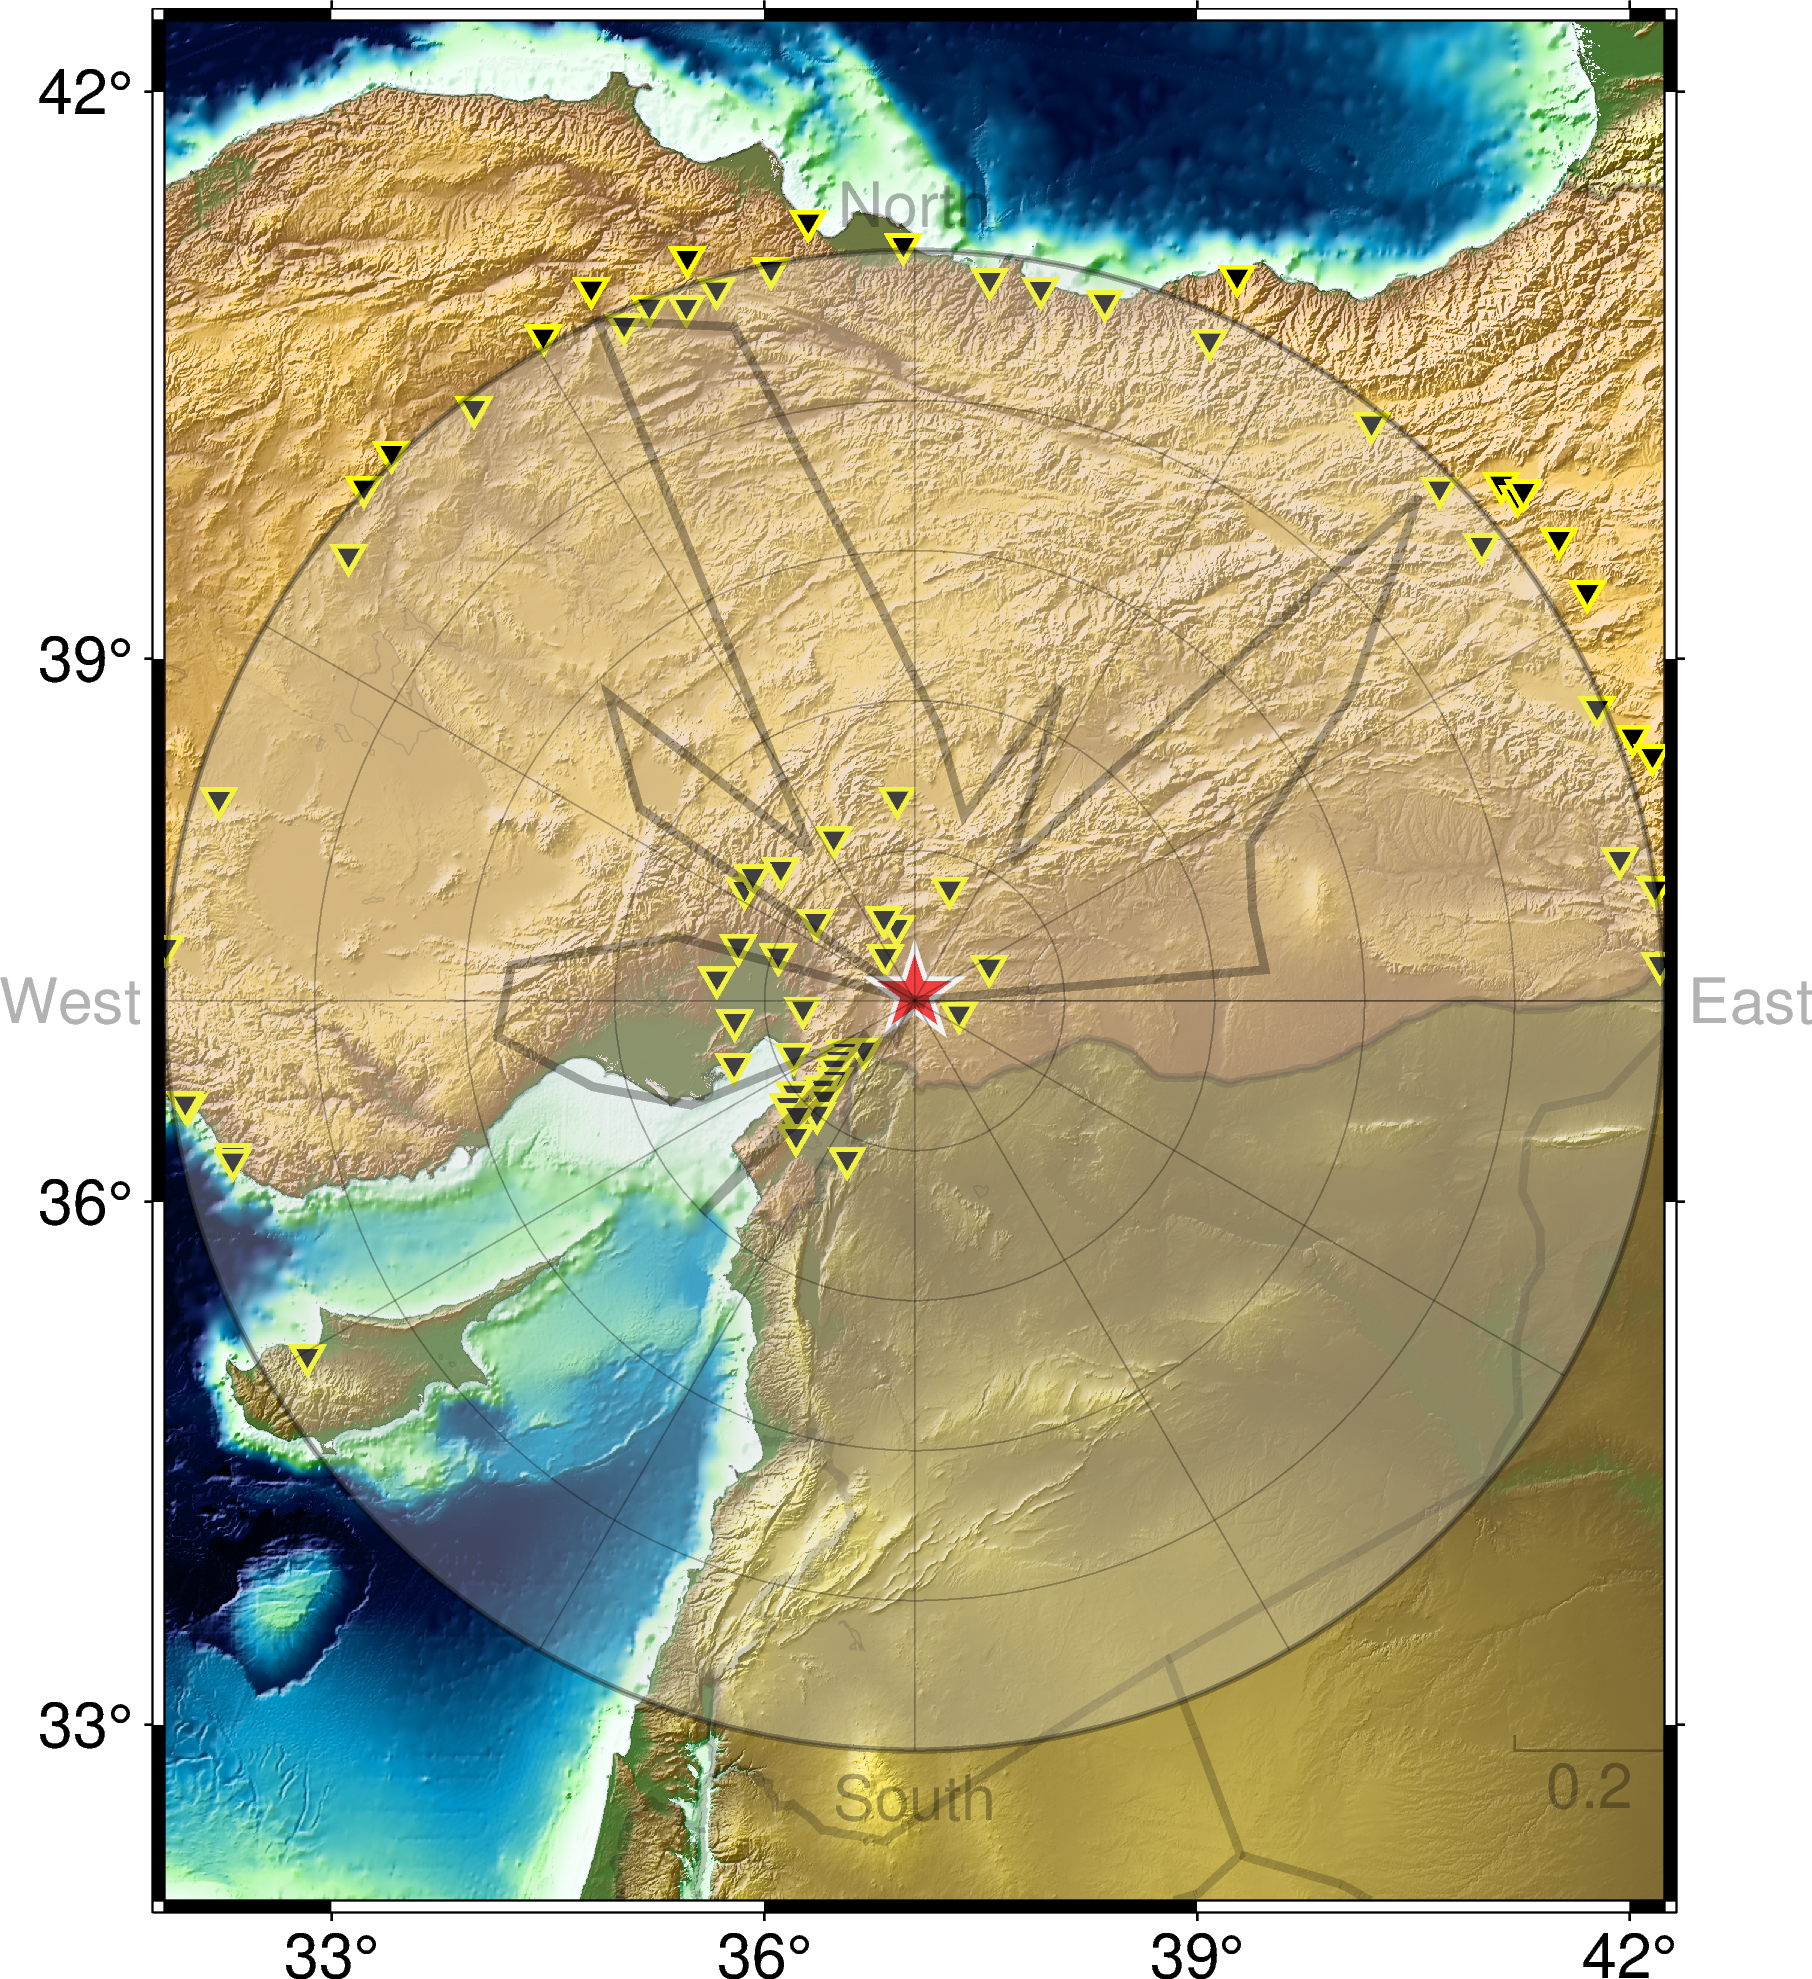

In [67]:
# Plot a map with all the info
# Initialize figure for map
fig1= pygmt.Figure()

# FORMATEA TAMANO DE LETRA
pygmt.config(FORMAT_GEO_MAP='D')  # Use decimal degrees
pygmt.config(FONT='15p')

# Minimum and Maximum coordinates
min_lat = main_lat-4#3436.0#np.min(stations_lat)
max_lat = main_lat+4#42#39.0#np.max(stations_lat)
min_lon = main_lon-4#33#35#np.min(stations_lon)
max_lon = main_lon+4#42#39.4#np.max(stations_lon)
canvas = (max_lon - min_lon)*0.15

# Plot elevation from grid
fig1.grdimage(
    '@earth_relief_15s',  #DATABASE FORM INTERNET
    region=[min_lon-canvas, max_lon+canvas, min_lat-canvas, max_lat+canvas],
    projection='M5i',
    cmap='relief',
    #frame=['WSne','a0.2f0.2']
    shading=True,
    #transparency=70
    frame=['WSne','ag','3p']
)

# Plot coast lines for the whole world
fig1.coast(
    region=[min_lon-canvas, max_lon+canvas, min_lat-canvas, max_lat+canvas],
    projection='M5i',
    shorelines='0.25/5.25p,black', 
    # Nivel de Linea1-4 / Ancho de lapiz , color
    water=None,
    borders="1/2p,black",
    land=None,
    resolution="f",
    dcw="TR+glightred+p0.5p",
    transparency=80,
)

# Plotting only the useful stations
station_lat, station_lon = [], []
with open('inv_sac_file_lst.txt') as f:
    lines = f.read().splitlines()    
    for line in lines:
        file = line.split(".")[0] + '.asc'
        with open(file) as ff:
            linesf = ff.read().splitlines()    
            lat = linesf[16].split(":")[1]
            lon = linesf[17].split(":")[1]
            station_lat.append(float(lat))
            station_lon.append(float(lon))

# Plot events
fig1.plot(
    x=station_lon,
    y=station_lat,
    style='i0.3',
    region=[min_lon-canvas, max_lon+canvas, min_lat-canvas, max_lat+canvas],
    projection='M5i',
    color='black',
    pen='1.0p,yellow',
    #style='c0.005',
    #color='violet',
    #pen='0.001,black',
    label='Stations'
)

# Plot main event
fig1.plot(
    x=main_lon,
    y=main_lat,
    style='a0.8',
    region=[min_lon-canvas, max_lon+canvas, min_lat-canvas, max_lat+canvas],
    projection='M5i',
    color='red',
    pen='1.0p,white',
    #style='c0.005',
    #color='violet',
    #pen='0.001,black',
    label='Mainshock'
)


fig1.rose(
    # use columns of the sample dataset as input for the length and azimuth
    # parameters
    length=dis,
    azimuth=az,
    yshift="0.5i",
    # specify the "region" of interest in the (r,azimuth) space
    # [r0, r1, az0, az1], here, r0 is 0 and r1 is 1, for azimuth, az0 is 0 and
    # az1 is 360 which means we plot a full circle between 0 and 360 degrees
    #region=[min_lon-canvas, max_lon+canvas, min_lat-canvas, max_lat+canvas],
    #projection='M5i',
    region=[0, 1, 0, 360],
    # set the diameter of the rose diagram to 7.5 cm
    diameter="5i",
    
    # define the sector width in degrees, we append +r here to draw a rose
    # diagram instead of a sector diagram
    sector="10+r",
    # normalize bin counts by the largest value so all bin counts range from
    # 0 to 1
    norm=True,
    # use red3 as color fill for the sectors
    transparency=70,
    # define the frame with ticks and gridlines every 0.2
    # length unit in radial direction and every 30 degrees
    # in azimuthal direction, set background color to
    # lightgray
    frame=["x0.2g0.2", "y30g30", "+glightgray"],
    # use a pen size of 1p to draw the outlines
    pen="2p",
)


fig1.show()


In [83]:
azu, disu = [], []
for i in np.arange(0,len(az),3):
    azu.append(az[i])
    disu.append(dis[i])
    print(dis[i], az[i])
    


29.4394 322.216
29.8843 113.553
42.5272 345.022
46.5129 222.298
46.5944 222.602
48.9654 69.7804
50.1932 338.128
55.6835 230.95
62.1257 229.684
67.1953 227.663
67.9733 18.3079
69.2592 262.698
72.0267 223.372
75.427 306.69
80.914 224.623
83.4459 243.507
85.4694 221.084
87.0568 286.107
95.5569 219.324
96.2705 230.919
104.169 228.952
104.413 224.381
107.305 332.718
110.628 202.37
112.054 261.785
112.168 313.329
112.191 313.373
112.331 285.716
114.636 220.067
119.8 355.003
119.831 248.865
122.069 274.89
122.366 301.989
122.47 302.034
122.658 306.376
429.601 9.88382
430.52 5.84829
430.674 14.9676
430.699 23.6708
433.631 308.955
433.694 258.128
434.455 342.099
434.75 257.664
438.011 337.15
438.123 50.4472
438.926 344.724
439.894 77.6753
440.32 44.9748
440.462 37.7406
441.102 240.435
441.639 323.996
441.72 287.088
442.116 339.465
442.739 349.114
448.525 359.165
450.854 65.8355
451.942 313.756
453.758 331.338
454.009 317.067
454.499 262.76
455.81 262.969
458.754 80.3506
458.86 86.149
461.231 27